# IMPORT NECESSARY LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")


# ADJUSTS THE DEFAULT FIGURE SIZE FOR MATPLOTLIB PLOTS

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)

# READ DATASET

In [3]:
#Load the data
fiber_data=pd.read_excel("E:/Intern/fiber_data.xlsx")
#fiber_data=fiber_data.drop(["Source","Solution (Solvent Ratio)"],axis=1)

#  DISPLAY THE FIRST AND LAST FIVE ROWS OF THE DATA

In [4]:
fiber_data

,Source,Solvent,Solution (Solvent Ratio),δ* =Sum of Products of Volume Fraction and δ of Individual Solvents,Ra* (HSP distance between Polymer & Solvent mixture),Polymer Concentration (wt%),RED,Voltage (kV),Distance (cm),Feed (mL/h),Flory-Huggins χ parameter,Fiber Diameter (nm)
0,"K.P. Matabola, R.M. Moutloali, The influence o...",DMAC,1:0,22.771254,0.72111,22.0,0.075116,12,15,-,0.004855,98
1,NaN,DMAC,1:0,22.771254,0.72111,24.0,0.075116,12,15,-,0.004855,155
2,NaN,DMAC,1:0,22.771254,0.72111,26.0,0.075116,12,15,-,0.004855,240
3,NaN,DMAC,1:0,22.771254,0.72111,28.0,0.075116,12,15,-,0.004855,397
4,NaN,DMAC,1:0,22.771254,0.72111,28.0,0.075116,12,16,-,0.004855,314
...,...,...,...,...,...,...,...,...,...,...,...,...
287,NaN,DMF,1:0,24.862421,2.10000,18.0,0.218700,11.3,10,1,0.033900,203.1
288,NaN,DMF,1:0,24.862421,2.10000,18.0,0.218700,11.8,10,1,0.033900,148.2
289,NaN,DMF,1:0,24.862421,2.10000,18.0,0.218700,12.3,10,1,0.033900,203
290,NaN,DMF,1:0,24.862421,2.10000,18.0,0.218700,12.8,10,1,0.033900,194.2


# DISPLAY COLUMNS NAME OF YOURS DATASET

In [5]:
fiber_data.columns

Index(['Source', 'Solvent', 'Solution (Solvent Ratio)',
       'δ* =Sum of Products of Volume Fraction and δ of Individual Solvents',
       'Ra* (HSP distance between Polymer & Solvent mixture)',
       'Polymer Concentration (wt%)', 'RED ', 'Voltage (kV)', 'Distance (cm)',
       'Feed (mL/h)', 'Flory-Huggins χ parameter', 'Fiber Diameter (nm)'],
      dtype='object')

# DISPLAY THE SHAPE OF THE DATA

In [6]:
fiber_data.shape

(292, 12)

# SUMMARY OF THE DATA

In [7]:
fiber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 12 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Source                                                               31 non-null     object 
 1   Solvent                                                              292 non-null    object 
 2   Solution (Solvent Ratio)                                             292 non-null    object 
 3   δ* =Sum of Products of Volume Fraction and δ of Individual Solvents  292 non-null    float64
 4   Ra* (HSP distance between Polymer & Solvent mixture)                 292 non-null    float64
 5   Polymer Concentration (wt%)                                          292 non-null    float64
 6   RED                                                                  292 non-null    float64
 7   Voltage 

# CHANGE COLUMNS TYPE (OBJECT TO FLOAT)

In [8]:
for col in fiber_data.columns:
    if col in ["Voltage (kV)", "Distance (cm)", "Feed (mL/h)","Fiber Diameter (nm)"] and fiber_data[col].dtype == 'object':
        fiber_data[col] = pd.to_numeric(fiber_data[col], errors='coerce')


# FEATURE SELECTION (remove unwanted columns)

In [9]:
clear_fiber_data=fiber_data.iloc[:,5:]

In [10]:
clear_fiber_data

,Polymer Concentration (wt%),RED,Voltage (kV),Distance (cm),Feed (mL/h),Flory-Huggins χ parameter,Fiber Diameter (nm)
0,22.0,0.075116,12.0,15.0,NaN,0.004855,98.0
1,24.0,0.075116,12.0,15.0,NaN,0.004855,155.0
2,26.0,0.075116,12.0,15.0,NaN,0.004855,240.0
3,28.0,0.075116,12.0,15.0,NaN,0.004855,397.0
4,28.0,0.075116,12.0,16.0,NaN,0.004855,314.0
...,...,...,...,...,...,...,...
287,18.0,0.218700,11.3,10.0,1.0,0.033900,203.1
288,18.0,0.218700,11.8,10.0,1.0,0.033900,148.2
289,18.0,0.218700,12.3,10.0,1.0,0.033900,203.0
290,18.0,0.218700,12.8,10.0,1.0,0.033900,194.2


# SUMMARY OF THE CLEAR_FIBER_DATA

In [11]:
clear_fiber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Polymer Concentration (wt%)  292 non-null    float64
 1   RED                          292 non-null    float64
 2   Voltage (kV)                 222 non-null    float64
 3   Distance (cm)                273 non-null    float64
 4   Feed (mL/h)                  232 non-null    float64
 5   Flory-Huggins χ parameter    292 non-null    float64
 6   Fiber Diameter (nm)          267 non-null    float64
dtypes: float64(7)
memory usage: 16.1 KB


# TOTAL MISSING VALUES IN EACH COLUMNS

In [12]:
clear_fiber_data.isnull().sum()

Polymer Concentration (wt%)     0
RED                             0
Voltage (kV)                   70
Distance (cm)                  19
Feed (mL/h)                    60
Flory-Huggins χ parameter       0
Fiber Diameter (nm)            25
dtype: int64

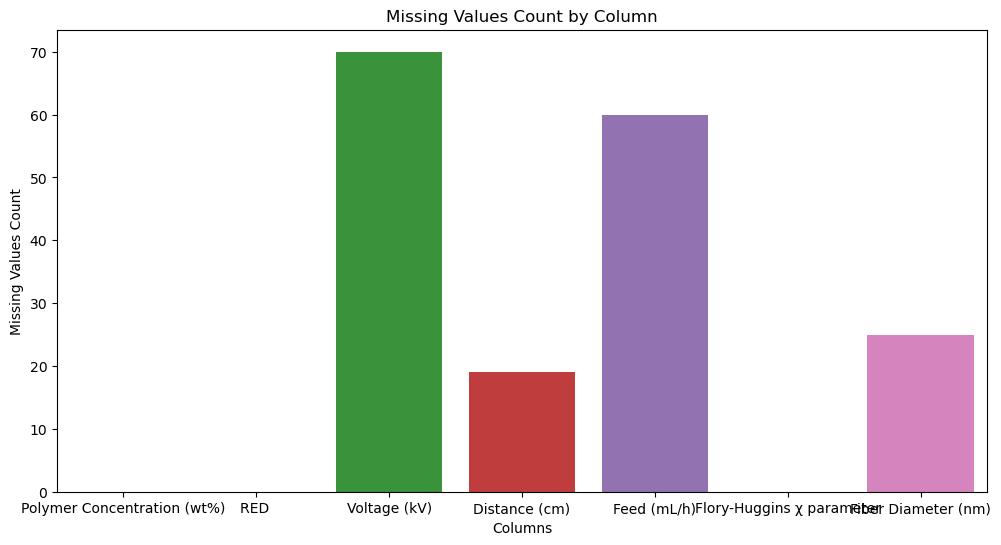

In [13]:
missing_values_count = clear_fiber_data.isnull().sum()

sns.barplot(x=missing_values_count.index, y=missing_values_count.values)
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.title('Missing Values Count by Column')
plt.show()


# DISPLAY NULL VALUE PERCENTAGE IN ASCENDING ORDER

In [14]:
missing_val=round((clear_fiber_data.isna().sum().sort_values()/len(clear_fiber_data))*100)
missing_val

Polymer Concentration (wt%)     0.0
RED                             0.0
Flory-Huggins χ parameter       0.0
Distance (cm)                   7.0
Fiber Diameter (nm)             9.0
Feed (mL/h)                    21.0
Voltage (kV)                   24.0
dtype: float64

In [15]:
missing_val=round(missing_val[missing_val>0])

In [16]:
missing_val

Distance (cm)           7.0
Fiber Diameter (nm)     9.0
Feed (mL/h)            21.0
Voltage (kV)           24.0
dtype: float64

# VISUAL REPRESENTATION

<Axes: >

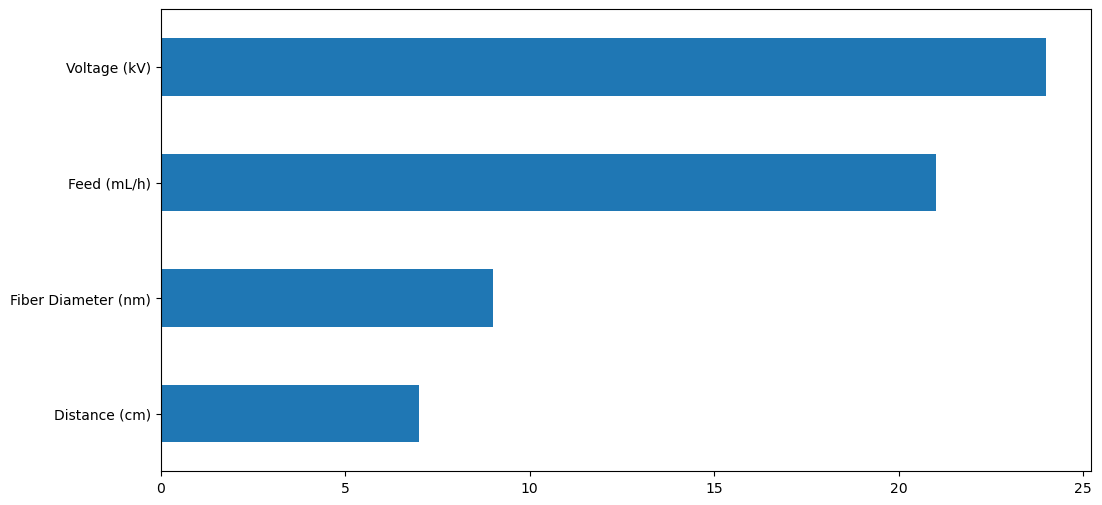

In [17]:
missing_val.plot(kind='barh')

<Axes: >

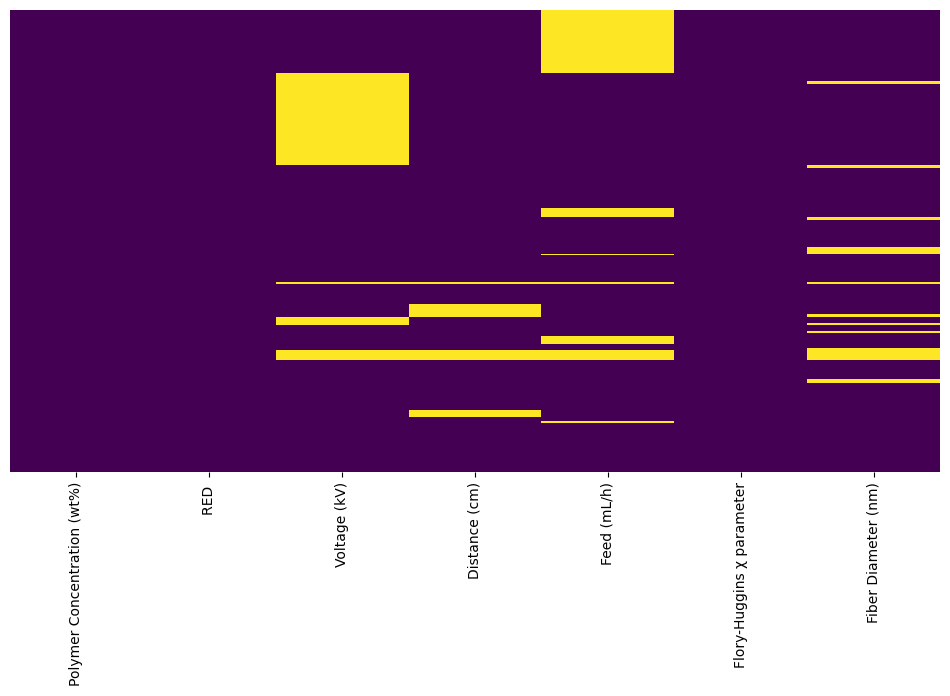

In [18]:
sns.heatmap(clear_fiber_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

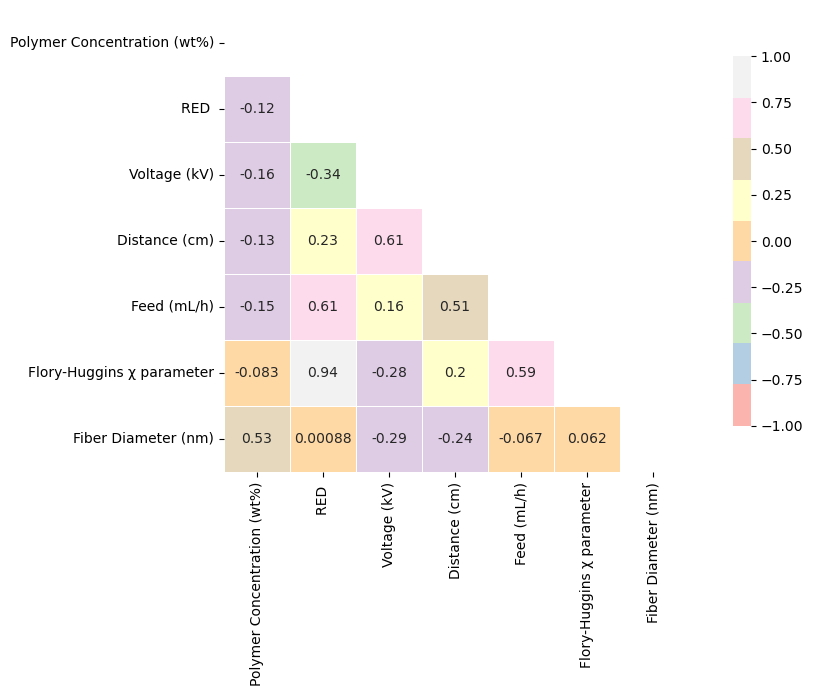

In [19]:
corr_matrix=clear_fiber_data.corr(method='spearman')

mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix,yticklabels=True,cmap='Pastel1',
            mask=mask,annot=True, center=0, vmax=1, vmin =-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

# FILL THE MISSING VALUES

 - Fiber Diameter (nm)

<Axes: xlabel='Polymer Concentration (wt%)', ylabel='Fiber Diameter (nm)'>

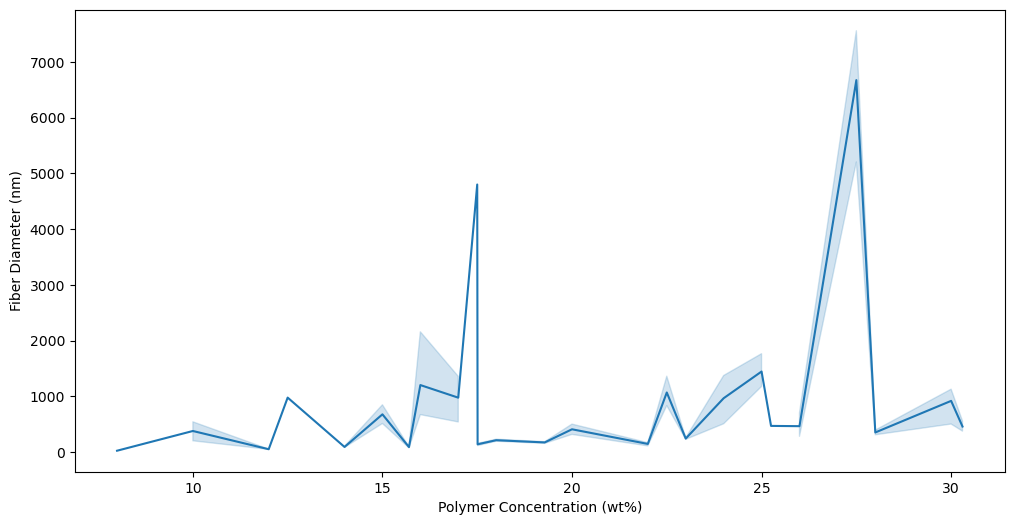

In [20]:
sns.lineplot(x='Polymer Concentration (wt%)',y='Fiber Diameter (nm)',data=fiber_data)

In [21]:
clear_fiber_data['Fiber Diameter (nm)'] = clear_fiber_data.groupby('Polymer Concentration (wt%)')['Fiber Diameter (nm)'].transform(lambda x: x.fillna(x.mean()))

<Axes: xlabel='Polymer Concentration (wt%)', ylabel='Fiber Diameter (nm)'>

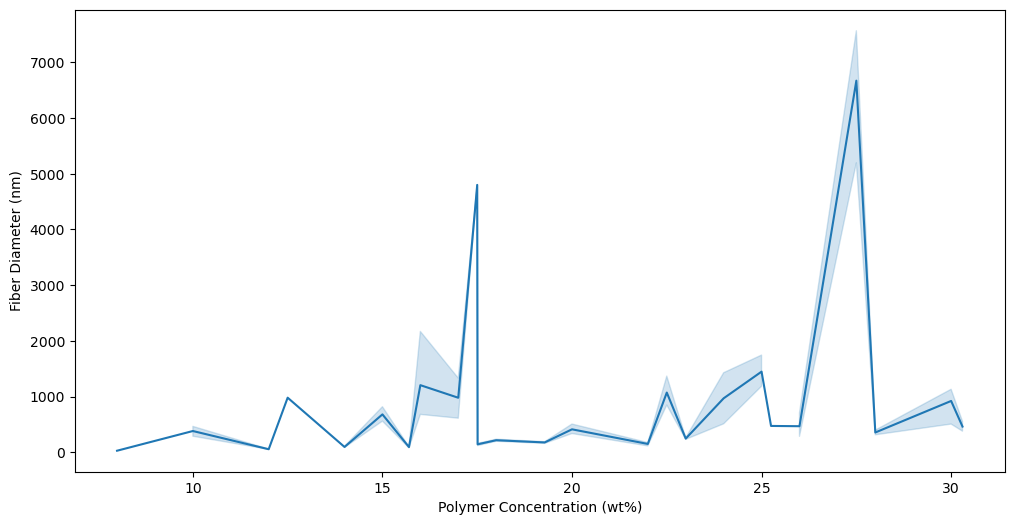

In [22]:
sns.lineplot(x='Polymer Concentration (wt%)',y='Fiber Diameter (nm)',data=clear_fiber_data)

 - 'Voltage (kV)'

<Axes: xlabel='Voltage (kV)', ylabel='Fiber Diameter (nm)'>

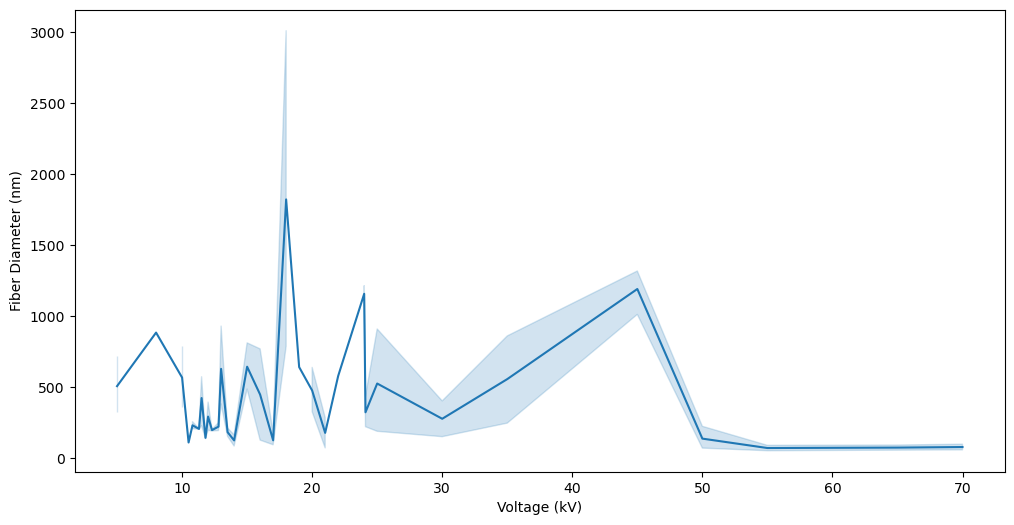

In [23]:
sns.lineplot(x='Voltage (kV)',y='Fiber Diameter (nm)',data=fiber_data)

In [24]:
clear_fiber_data['Voltage (kV)'] = clear_fiber_data.groupby('Polymer Concentration (wt%)')['Voltage (kV)'].transform(lambda x: x.fillna(x.mean()))

<Axes: xlabel='Voltage (kV)', ylabel='Fiber Diameter (nm)'>

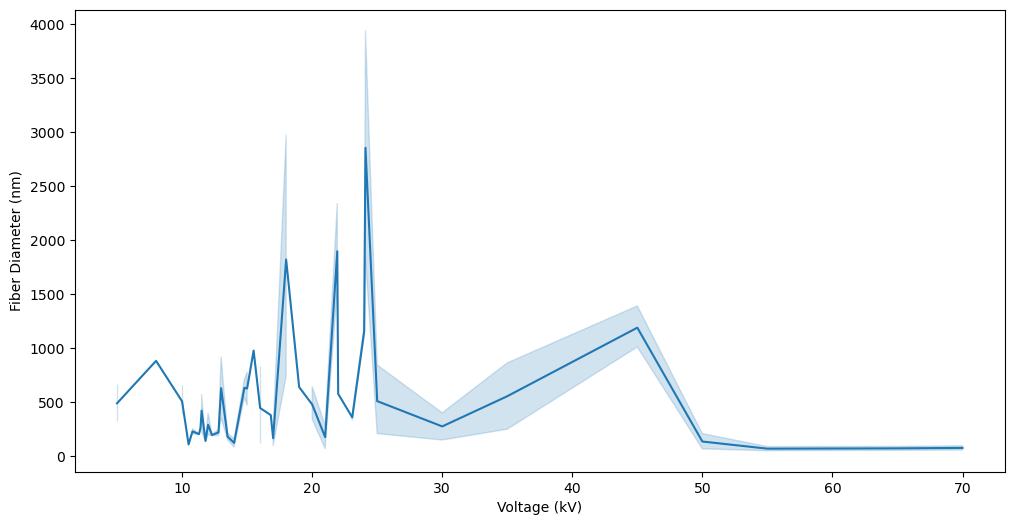

In [25]:
sns.lineplot(x='Voltage (kV)',y='Fiber Diameter (nm)',data=clear_fiber_data)

 - 'Distance (cm)'

<Axes: xlabel='Distance (cm)', ylabel='Fiber Diameter (nm)'>

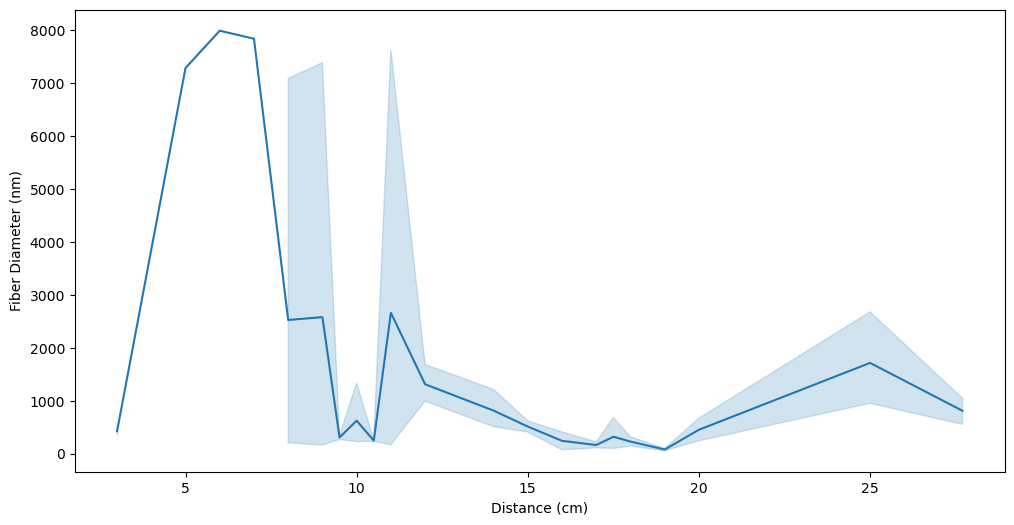

In [26]:
sns.lineplot(x='Distance (cm)',y='Fiber Diameter (nm)',data=fiber_data)

In [27]:
clear_fiber_data['Distance (cm)'] = clear_fiber_data.groupby('Polymer Concentration (wt%)')['Distance (cm)'].transform(lambda x: x.fillna(x.mean()))

<Axes: xlabel='Distance (cm)', ylabel='Fiber Diameter (nm)'>

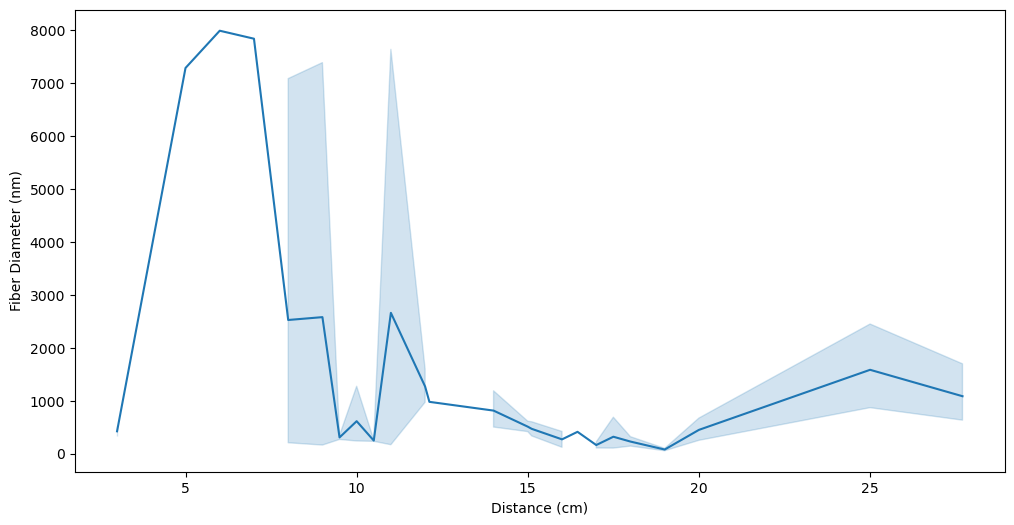

In [28]:
sns.lineplot(x='Distance (cm)',y='Fiber Diameter (nm)',data=clear_fiber_data)

 - FEED

<Axes: xlabel='Feed (mL/h)', ylabel='Fiber Diameter (nm)'>

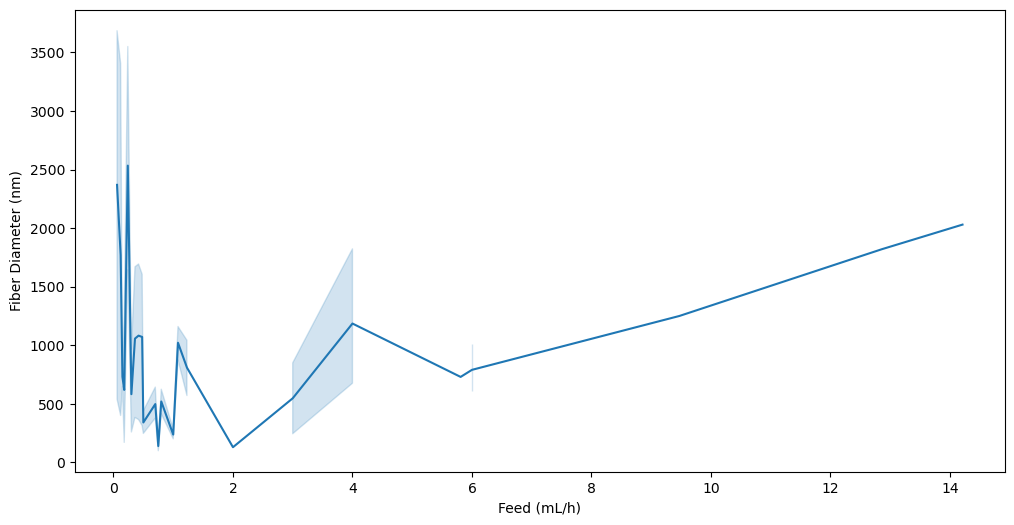

In [29]:
sns.lineplot(x='Feed (mL/h)',y='Fiber Diameter (nm)',data=fiber_data)

In [30]:
clear_fiber_data['Feed (mL/h)'] = clear_fiber_data.groupby('Polymer Concentration (wt%)')['Feed (mL/h)'].transform(lambda x: x.fillna(x.mean()))

In [31]:
clear_fiber_data.isnull().sum()

Polymer Concentration (wt%)     0
RED                             0
Voltage (kV)                    1
Distance (cm)                   1
Feed (mL/h)                    23
Flory-Huggins χ parameter       0
Fiber Diameter (nm)             3
dtype: int64

In [32]:
missing_values_feed = clear_fiber_data[clear_fiber_data['Feed (mL/h)'].isnull()]

In [33]:
max_diameter=missing_values_feed['Fiber Diameter (nm)'].max()

In [34]:
#sns.lineplot(y='Feed (mL/h)',x='Fiber Diameter (nm)',data=clear_fiber_data[clear_fiber_data['Fiber Diameter (nm)'] < max_diameter])

In [35]:
clear_fiber_data.loc[clear_fiber_data['Fiber Diameter (nm)'] < max_diameter, 'Feed (mL/h)'] = clear_fiber_data[clear_fiber_data['Fiber Diameter (nm)'] < max_diameter]['Feed (mL/h)'].fillna(clear_fiber_data[clear_fiber_data['Fiber Diameter (nm)'] < max_diameter]['Feed (mL/h)'].mean())

<Axes: xlabel='Feed (mL/h)', ylabel='Fiber Diameter (nm)'>

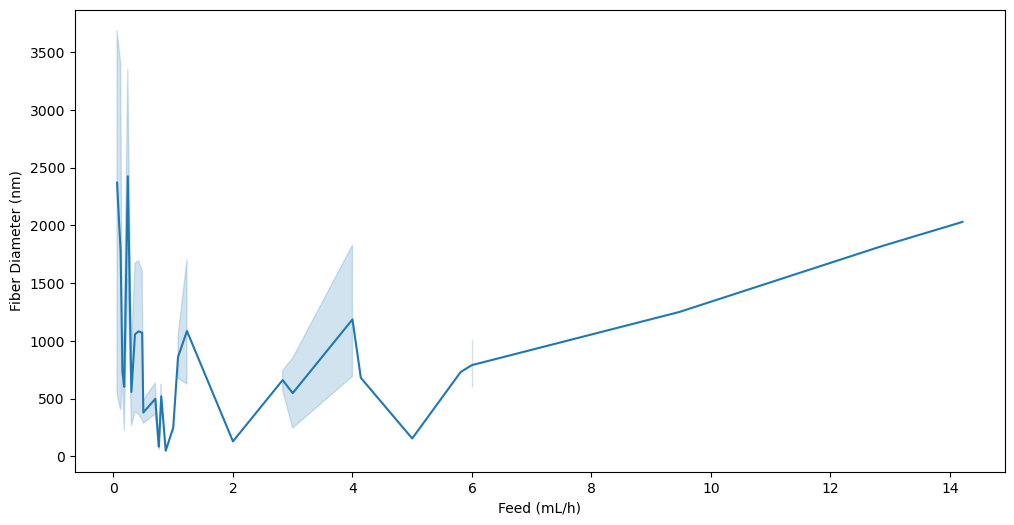

In [36]:
sns.lineplot(x='Feed (mL/h)',y='Fiber Diameter (nm)',data=clear_fiber_data)

In [37]:
clear_fiber_data.isnull().sum()

Polymer Concentration (wt%)    0
RED                            0
Voltage (kV)                   1
Distance (cm)                  1
Feed (mL/h)                    2
Flory-Huggins χ parameter      0
Fiber Diameter (nm)            3
dtype: int64

# DROP

In [38]:
clear_fiber_data=clear_fiber_data.dropna()

In [39]:
clear_fiber_data.describe()

,Polymer Concentration (wt%),RED,Voltage (kV),Distance (cm),Feed (mL/h),Flory-Huggins χ parameter,Fiber Diameter (nm)
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,19.212917,0.162954,22.368104,15.351013,1.207058,0.026135,818.704268
std,5.128778,0.096776,13.134601,4.633670,1.704752,0.028241,1360.109546
min,8.000000,0.075116,5.000000,3.000000,0.060000,0.004041,28.000000
25%,15.000000,0.075116,14.000000,12.000000,0.465000,0.004888,167.525000
50%,20.000000,0.103183,20.000000,15.000000,0.700000,0.007533,382.833333
75%,22.500000,0.218750,24.100000,18.000000,1.080000,0.034500,893.000000
max,30.300000,0.490026,70.000000,27.700000,14.210000,0.165076,7994.000000


# VISUALIZATION

<Axes: xlabel='Polymer Concentration (wt%)', ylabel='Fiber Diameter (nm)'>

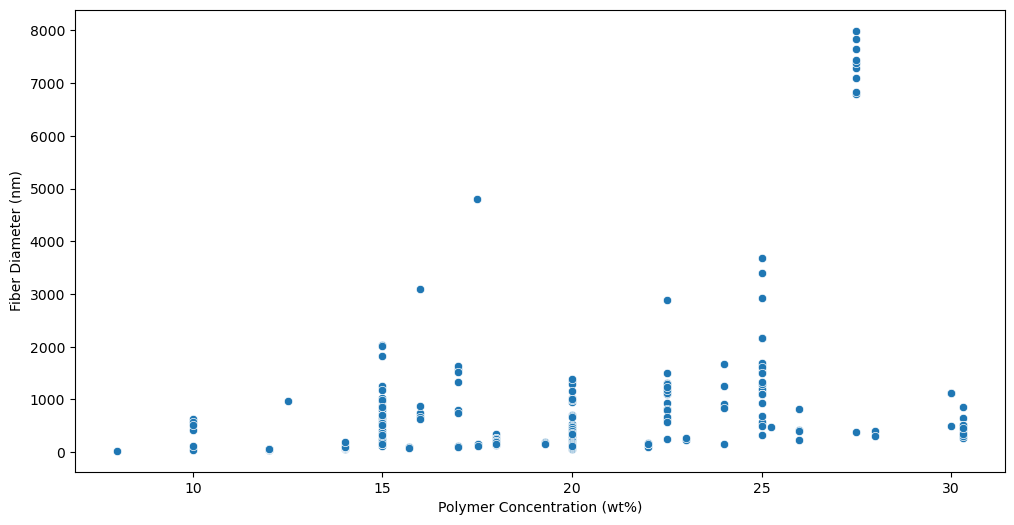

In [40]:
sns.scatterplot(data=fiber_data, x='Polymer Concentration (wt%)', y='Fiber Diameter (nm)')

<Axes: xlabel='Distance (cm)', ylabel='Fiber Diameter (nm)'>

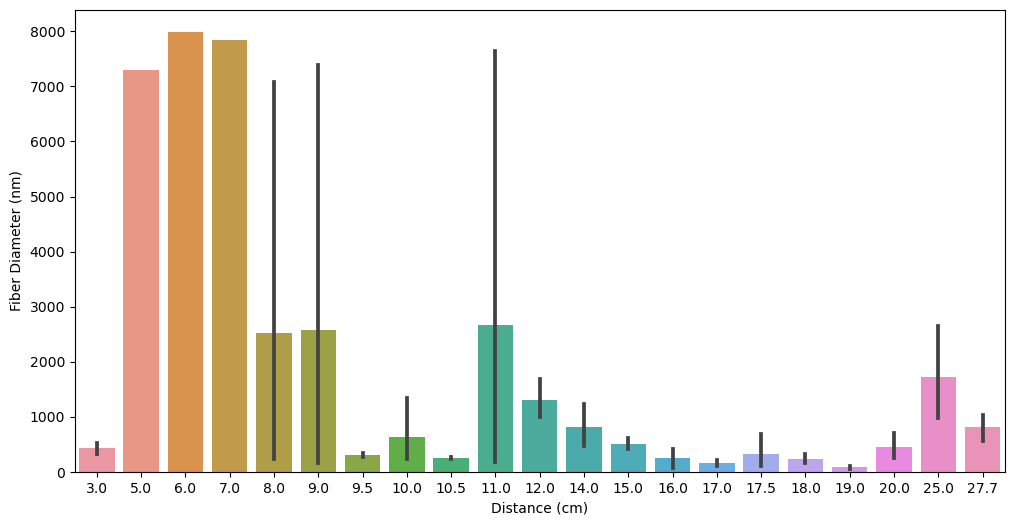

In [41]:
sns.barplot(x='Distance (cm)',y='Fiber Diameter (nm)',data=fiber_data)

<Axes: xlabel='Fiber Diameter (nm)', ylabel='Count'>

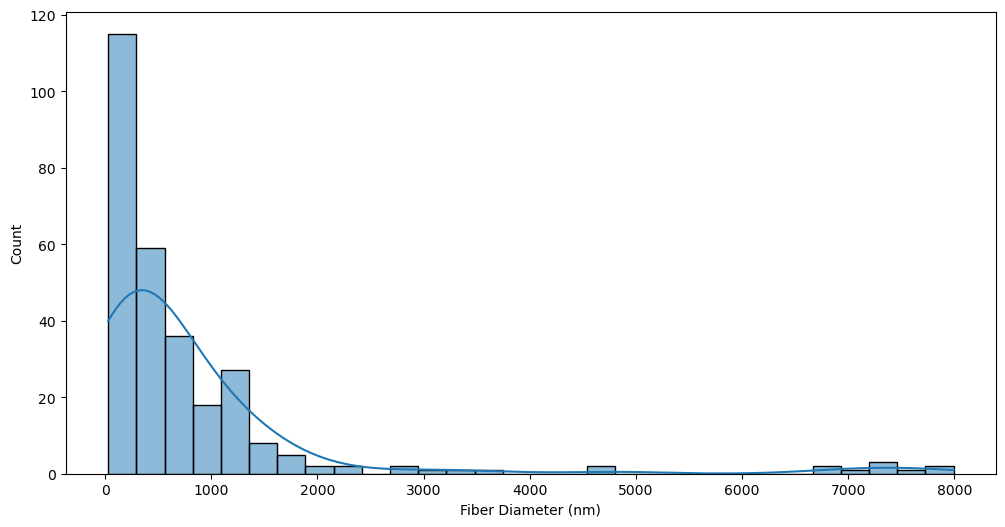

In [42]:
sns.histplot(data=clear_fiber_data, x='Fiber Diameter (nm)', bins=30, kde=True)

# MODEL BUILDING

In [43]:
X = clear_fiber_data.drop("Fiber Diameter (nm)",axis=1)
y = clear_fiber_data["Fiber Diameter (nm)"]

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Create an instance of the StandardScaler
scaler = StandardScaler()

# Define the columns you want to standardize
columns_to_standardize = ['Polymer Concentration (wt%)', 'Voltage (kV)', 'Distance (cm)', 'Feed (mL/h)']

# Apply standardization to the selected columns
#X[columns_to_standardize] = scaler.fit_transform(X[columns_to_standardize])

# Create an instance of the MinMaxScaler
minmax_scaler = MinMaxScaler(feature_range=(0, 1))

# Apply normalization to the selected columns
X[columns_to_standardize] = minmax_scaler.fit_transform(X[columns_to_standardize])


In [45]:
X.describe()

,Polymer Concentration (wt%),RED,Voltage (kV),Distance (cm),Feed (mL/h),Flory-Huggins χ parameter
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,0.502821,0.162954,0.267202,0.500041,0.081064,0.026135
std,0.229990,0.096776,0.202071,0.187598,0.120477,0.028241
min,0.000000,0.075116,0.000000,0.000000,0.000000,0.004041
25%,0.313901,0.075116,0.138462,0.364372,0.028622,0.004888
50%,0.538117,0.103183,0.230769,0.485830,0.045230,0.007533
75%,0.650224,0.218750,0.293846,0.607287,0.072085,0.034500
max,1.000000,0.490026,1.000000,1.000000,1.000000,0.165076


# TRAIN_TEST_SPLIT

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# RandomForestRegressor

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Create the RandomForestRegressor model
model_1=RandomForestRegressor()

# Define the hyperparameters and their values to search over
model_1_param_grid = {

    'n_estimators': [3,5,10,20,50],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', None]

}

model_1_num_combination = 1

for model_1_k in model_1_param_grid.keys():
    model_1_num_combination *= len(model_1_param_grid[model_1_k])

print("Number of Combinations: ", model_1_num_combination)

# Perform grid search
model_1_grid_search = GridSearchCV(estimator=model_1, param_grid=model_1_param_grid, cv=5)
model_1_grid_search.fit(X_train, y_train)


Number of Combinations:  720


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [3, 5, 10, 20, 50]})

In [48]:
# Get the best hyperparameters and the best model for model_1
model_1_best_params = model_1_grid_search.best_params_
model_1_best_model = model_1_grid_search.best_estimator_

In [49]:
model_1_best_params

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 5}

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model_1 Train evaluation

y_predict_model_1_train = model_1_grid_search.predict(X_train)

model_1_mae_train = mean_absolute_error(y_train, y_predict_model_1_train)
model_1_mse_train = mean_squared_error(y_train, y_predict_model_1_train)
model_1_rmse_train = np.sqrt(model_1_mse_train)
model_1_r2_train = r2_score(y_train, y_predict_model_1_train)


print("Model_1 Training evaluation")
print("Mean Absolute Error:", model_1_mae_train)
print("Mean Squared Error:", model_1_mse_train)
print("Root Mean Squared Error:", model_1_rmse_train)
print("R-squared Score:", model_1_r2_train)

print()

Model_1 Training evaluation
Mean Absolute Error: 234.83182463454992
Mean Squared Error: 223887.45273241925
Root Mean Squared Error: 473.16746795655683
R-squared Score: 0.8747039104239243



In [51]:
# Model_1 Test evaluation

y_predict_model_1 = model_1_grid_search.predict(X_test)

model_1_mae = mean_absolute_error(y_test, y_predict_model_1)
model_1_mse = mean_squared_error(y_test, y_predict_model_1)
model_1_rmse = np.sqrt(model_1_mse)
model_1_r2 = r2_score(y_test, y_predict_model_1)


print("Model_1 Test evaluation")
print("Mean Absolute Error:", model_1_mae)
print("Mean Squared Error:", model_1_mse)
print("Root Mean Squared Error:", model_1_rmse)
print("R-squared Score:", model_1_r2)

print()

Model_1 Test evaluation
Mean Absolute Error: 234.1752678990775
Mean Squared Error: 159512.0249568771
Root Mean Squared Error: 399.38956540810767
R-squared Score: 0.9228177399040016



In [52]:
# Accuracy of the model
model_1_accuracy = model_1_grid_search.score(X_test, y_test)
model_1_accuracy

0.9228177399040016

# SVM

In [53]:
from sklearn.svm import SVR

# Create the SVR model
model_2 = SVR()

# Define the hyperparameters and their values to search over
model_2_param_grid = {
    'kernel': ['rbf','poly','sigmoid','linear'],
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto'],
    }

model_2_num_combination = 1

for model_2_k in model_2_param_grid.keys():
    model_2_num_combination *= len(model_2_param_grid[model_2_k])

print("Number of Combinations: ", model_2_num_combination)


# Perform grid search
model_2_grid_search = GridSearchCV(estimator=model_2, param_grid=model_2_param_grid, cv=5)
model_2_grid_search.fit(X_train, y_train)


Number of Combinations:  40


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [54]:
# Get the best hyperparameters and the best model for model_3
model_2_best_params = model_2_grid_search.best_params_
model_2_best_model = model_2_grid_search.best_estimator_

In [55]:
model_2_best_params

{'C': 1000, 'gamma': 'scale', 'kernel': 'poly'}

In [56]:
# Model_2 Train evaluation

y_predict_model_2_train = model_2_grid_search.predict(X_train)

model_2_mae_train = mean_absolute_error(y_train, y_predict_model_2_train)
model_2_mse_train = mean_squared_error(y_train, y_predict_model_2_train)
model_2_rmse_train = np.sqrt(model_2_mse_train)
model_2_r2_train = r2_score(y_train, y_predict_model_2_train)


print("Model_2 Train evaluation")
print("Mean Absolute Error:", model_2_mae_train)
print("Mean Squared Error:", model_2_mse_train)
print("Root Mean Squared Error:", model_2_rmse_train)
print("R-squared Score:", model_2_r2_train)

print()

Model_2 Train evaluation
Mean Absolute Error: 331.755898932371
Mean Squared Error: 584048.6471235857
Root Mean Squared Error: 764.2307551542176
R-squared Score: 0.6731437572151795



In [57]:
# Model_2 test evaluation
y_predict_model_2 = model_2_grid_search.predict(X_test)

model_2_mae = mean_absolute_error(y_test, y_predict_model_2)
model_2_mse = mean_squared_error(y_test, y_predict_model_2)
model_2_rmse = np.sqrt(model_2_mse)
model_2_r2 = r2_score(y_test, y_predict_model_2)


print("Model_2 test evaluation")
print("Mean Absolute Error:", model_2_mae)
print("Mean Squared Error:", model_2_mse)
print("Root Mean Squared Error:", model_2_rmse)
print("R-squared Score:", model_2_r2)

print()

Model_2 test evaluation
Mean Absolute Error: 312.2129615266444
Mean Squared Error: 345917.6031665916
Root Mean Squared Error: 588.147603214186
R-squared Score: 0.8326226350232466



In [58]:
# Accuracy of the model
model_2_accuracy = model_2_grid_search.score(X_test, y_test)
model_2_accuracy

0.8326226350232466

# KNeighborsRegressor

In [59]:
from sklearn.neighbors import KNeighborsRegressor

# Create the KNeighborsRegressor model
model_3 = KNeighborsRegressor()

# Define the hyperparameters and their values to search over
model_3_param_grid = {
    'n_neighbors': [1,3,5,7,9,11],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski','euclidean','manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40],
    'p': [1, 2]

}

model_3_num_combination = 1

for model_3_k in model_3_param_grid.keys():
    model_3_num_combination *= len(model_3_param_grid[model_3_k])

print("Number of Combinations: ", model_3_num_combination)


# Perform grid search
model_3_grid_search = GridSearchCV(estimator=model_3, param_grid=model_3_param_grid, cv=5)
model_3_grid_search.fit(X_train, y_train)

Number of Combinations:  1152


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [60]:
# Get the best hyperparameters and the best model for model_4
model_3_best_params = model_3_grid_search.best_params_
model_3_best_model = model_3_grid_search.best_estimator_

In [61]:
model_3_best_params

{'algorithm': 'ball_tree',
 'leaf_size': 10,
 'metric': 'minkowski',
 'n_neighbors': 3,
 'p': 1,
 'weights': 'uniform'}

In [62]:
# Model_3 Train evaluation

y_predict_model_3_train = model_3_grid_search.predict(X_train)

model_3_mae_train = mean_absolute_error(y_train, y_predict_model_3_train)
model_3_mse_train = mean_squared_error(y_train, y_predict_model_3_train)
model_3_rmse_train = np.sqrt(model_3_mse_train)
model_3_r2_train = r2_score(y_train, y_predict_model_3_train)


print("Model_3 Train evaluation")
print("Mean Absolute Error:", model_3_mae_train)
print("Mean Squared Error:", model_3_mse_train)
print("Root Mean Squared Error:", model_3_rmse_train)
print("R-squared Score:", model_3_r2_train)

print()

Model_3 Train evaluation
Mean Absolute Error: 153.65518566741585
Mean Squared Error: 118890.7839443876
Root Mean Squared Error: 344.80542911095176
R-squared Score: 0.9334641127358326



In [63]:
# test the model
y_predict_model_3 = model_3_grid_search.predict(X_test)

model_3_mae = mean_absolute_error(y_test, y_predict_model_3)
model_3_mse = mean_squared_error(y_test, y_predict_model_3)
model_3_rmse = np.sqrt(model_3_mse)
model_3_r2 = r2_score(y_test, y_predict_model_3)


print("Model_4 evaluation")
print("Mean Absolute Error:", model_3_mae)
print("Mean Squared Error:", model_3_mse)
print("Root Mean Squared Error:", model_3_rmse)
print("R-squared Score:", model_3_r2)

print()

Model_4 evaluation
Mean Absolute Error: 209.5362359395169
Mean Squared Error: 127534.29774995463
Root Mean Squared Error: 357.11944465396255
R-squared Score: 0.9382906376948159



In [64]:
# Accuracy of the model
model_3_accuracy = model_3_grid_search.score(X_test, y_test)
model_3_accuracy

0.9382906376948159

# GradientBoostingRegressor

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

# Create the GradientBoostingRegressor model
model_4=GradientBoostingRegressor()

# Define the hyperparameters and their values to search over
model_4_param_grid = {
    'n_estimators': [3,5,10,20,40],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2',None]
}

model_4_num_combination = 1

for model_4_k in model_4_param_grid.keys():
    model_4_num_combination *= len(model_4_param_grid[model_4_k])

print("Number of Combinations: ", model_4_num_combination)

# Perform grid search
model_4_grid_search = GridSearchCV(estimator=model_4, param_grid=model_4_param_grid, cv=5)
model_4_grid_search.fit(X_train, y_train)


Number of Combinations:  1620


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [3, 5, 10, 20, 40]})

In [66]:
# Get the best hyperparameters and the best model for model_2
model_4_best_params = model_4_grid_search.best_params_
model_4_best_model = model_4_grid_search.best_estimator_

In [67]:
model_4_best_params

{'learning_rate': 0.5,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 40}

In [68]:
# Model_4 train evaluation
y_predict_model_4_train = model_4_grid_search.predict(X_train)

model_4_mae_train = mean_absolute_error(y_train, y_predict_model_4_train)
model_4_mse_train = mean_squared_error(y_train, y_predict_model_4_train)
model_4_rmse_train = np.sqrt(model_4_mse_train)
model_4_r2_train = r2_score(y_train, y_predict_model_4_train)


print("Model_4 Train evaluation")
print("Mean Absolute Error:", model_4_mae_train)
print("Mean Squared Error:", model_4_mse_train)
print("Root Mean Squared Error:", model_4_rmse_train)
print("R-squared Score:", model_4_r2_train)

print()

Model_4 Train evaluation
Mean Absolute Error: 59.8707211419737
Mean Squared Error: 12712.591476786585
Root Mean Squared Error: 112.75012850008902
R-squared Score: 0.9928855414585327



In [69]:
# test the model
y_predict_model_4 = model_4_grid_search.predict(X_test)

model_4_mae = mean_absolute_error(y_test, y_predict_model_4)
model_4_mse = mean_squared_error(y_test, y_predict_model_4)
model_4_rmse = np.sqrt(model_4_mse)
model_4_r2 = r2_score(y_test, y_predict_model_4)


print("Model_4 Test evaluation")
print("Mean Absolute Error:", model_4_mae)
print("Mean Squared Error:", model_4_mse)
print("Root Mean Squared Error:", model_4_rmse)
print("R-squared Score:", model_4_r2)

print()

Model_4 Test evaluation
Mean Absolute Error: 200.47366712303446
Mean Squared Error: 106377.55639116574
Root Mean Squared Error: 326.1557241428789
R-squared Score: 0.948527640922499



# XGBoost

In [70]:
import xgboost as xgb

# Create the XGBoost model
model_5 = xgb.XGBRegressor()

# Define the hyperparameters and their values to search over
model_5_param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]

}

model_5_num_combination = 1

for model_5_k in model_5_param_grid.keys():
    model_5_num_combination *= len(model_5_param_grid[model_5_k])

print("Number of Combinations: ", model_5_num_combination)


# Perform grid search
model_5_grid_search = GridSearchCV(estimator=model_5, param_grid=model_5_param_grid, cv=5)
model_5_grid_search.fit(X_train, y_train)

Number of Combinations:  2916


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'reg_alpha': [0, 0.1, 1], 'reg_lambda': [0, 0.1, 1],
                         'subsample': [0.8, 1.0]})

In [71]:
# Get the best hyperparameters and the best model for model_5
model_5_best_params = model_5_grid_search.best_params_
model_5_best_model = model_5_grid_search.best_estimator_

In [72]:
model_5_best_params

{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 300,
 'reg_alpha': 0.1,
 'reg_lambda': 0,
 'subsample': 1.0}

In [73]:
# Model_5 train evaluation
y_predict_model_5_train = model_5_grid_search.predict(X_train)

model_5_mae_train = mean_absolute_error(y_train, y_predict_model_5_train)
model_5_mse_train = mean_squared_error(y_train, y_predict_model_5_train)
model_5_rmse_train = np.sqrt(model_5_mse_train)
model_5_r2_train = r2_score(y_train, y_predict_model_5_train)


print("Model_5 Train evaluation")
print("Mean Absolute Error:", model_5_mae_train)
print("Mean Squared Error:", model_5_mse_train)
print("Root Mean Squared Error:", model_5_rmse_train)
print("R-squared Score:", model_5_r2_train)

print()

Model_5 Train evaluation
Mean Absolute Error: 65.51598101267386
Mean Squared Error: 13254.01179320743
Root Mean Squared Error: 115.12606912948705
R-squared Score: 0.9925825416805789



In [74]:
# Model_5 test evaluation
y_predict_model_5 = model_5_grid_search.predict(X_test)

model_5_mae = mean_absolute_error(y_test, y_predict_model_5)
model_5_mse = mean_squared_error(y_test, y_predict_model_5)
model_5_rmse = np.sqrt(model_5_mse)
model_5_r2 = r2_score(y_test, y_predict_model_5)


print("Model_5 test evaluation")
print("Mean Absolute Error:", model_5_mae)
print("Mean Squared Error:", model_5_mse)
print("Root Mean Squared Error:", model_5_rmse)
print("R-squared Score:", model_5_r2)

print()

Model_5 test evaluation
Mean Absolute Error: 212.9593244876682
Mean Squared Error: 134670.05909928257
Root Mean Squared Error: 366.9741940508659
R-squared Score: 0.9348378936863583



In [75]:
# Evaluate the model
accuracy = model_5_grid_search.score(X_test, y_test)
accuracy

0.9348378936863583

# RESULT

In [76]:
rows = []

model_name=["RandomForestRegressor","SVM","KNeighborsRegressor","GradientBoostingRegressor","XGBRegressor"]

# Loop through the range 1 to 5
for i in range(1, 6):
    # Assign values to model-specific variables
    model_mae = f"model_{i}_mae"
    model_mse = f"model_{i}_mse"
    model_rmse = f"model_{i}_rmse"
    model_r2 = f"model_{i}_r2"
    model_best_params = f"model_{i}_best_params"

    # Create a dictionary for the model performance metrics
    performance_dict = {
        'Model': model_name[i-1],
        'Mean Absolute Error (MAE)': eval(model_mae),
        'Mean Squared Error (MSE)': eval(model_mse),
        'Root Mean Squared Error (RMSE)': eval(model_rmse),
        'R-squared Score': eval(model_r2),
        'Best Hyperparameters': eval(model_best_params)
    }

    # Append the performance dictionary to the list
    rows.append(performance_dict)

# Convert the list of dictionaries into a DataFrame
performance_df = pd.DataFrame(rows)


In [77]:
performance_df

,Model,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared Score,Best Hyperparameters
0,RandomForestRegressor,234.175268,159512.024957,399.389565,0.922818,"{'max_depth': 10, 'max_features': 'log2', 'min..."
1,SVM,312.212962,345917.603167,588.147603,0.832623,"{'C': 1000, 'gamma': 'scale', 'kernel': 'poly'}"
2,KNeighborsRegressor,209.536236,127534.297750,357.119445,0.938291,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'm..."
3,GradientBoostingRegressor,200.473667,106377.556391,326.155724,0.948528,"{'learning_rate': 0.5, 'max_depth': 5, 'max_fe..."
4,XGBRegressor,212.959324,134670.059099,366.974194,0.934838,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin..."


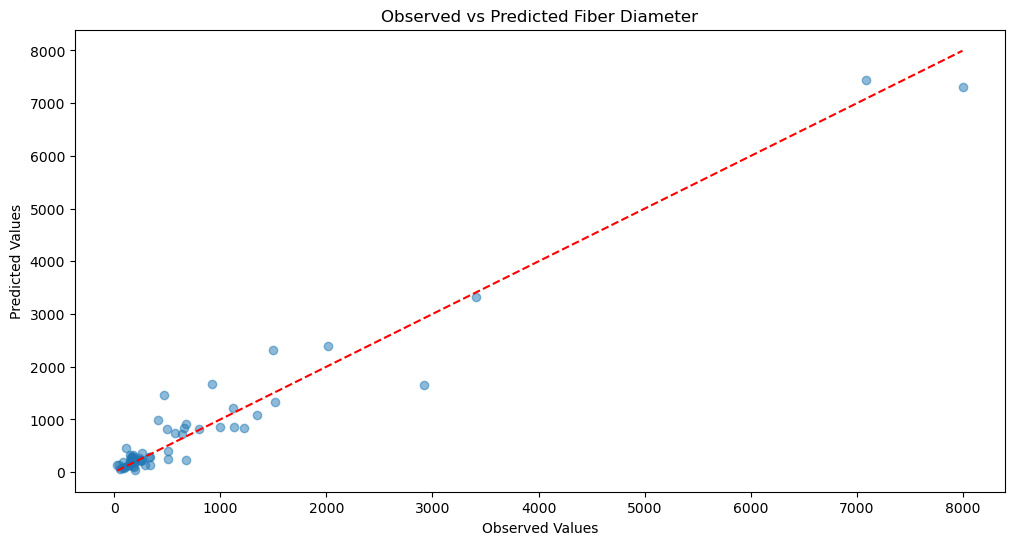

In [80]:
import matplotlib.pyplot as plt


# Create a scatter plot of observed versus predicted values
plt.scatter(y_test, y_predict_model_4, alpha=0.5)
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Fiber Diameter')

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')

# Show the plot
plt.show()

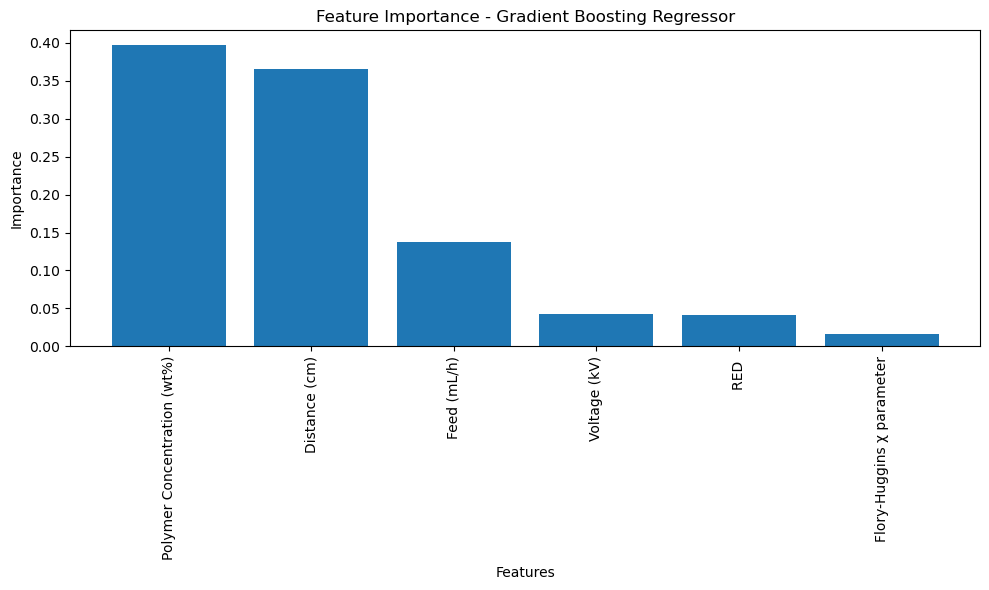

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Train the XGBoost Regressor model
model = GradientBoostingRegressor(**model_4_best_params)
model.fit(X_train, y_train)

# Get the feature importances
importances = model.feature_importances_
features = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Gradient Boosting Regressor")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation='vertical')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()

# Show the plot
plt.show()